<a href="https://colab.research.google.com/github/HLaw18/4105/blob/main/HW2_4105.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


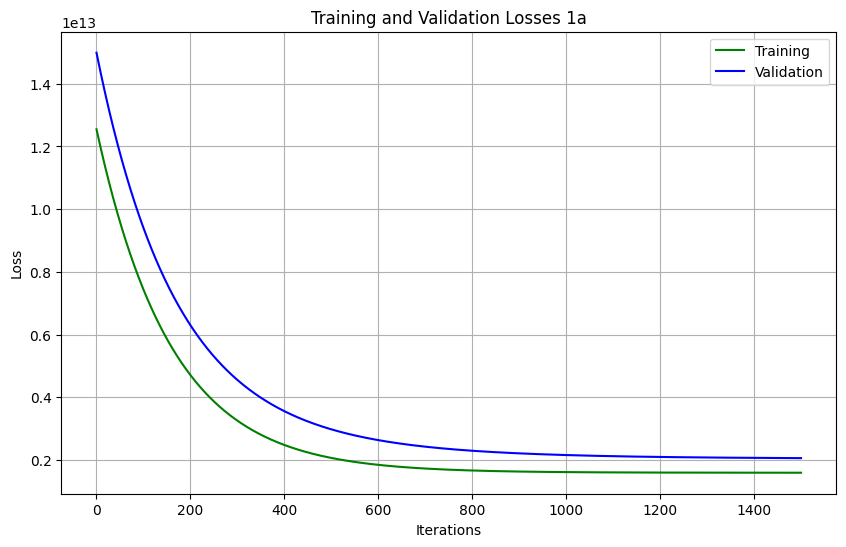

Final theta = [1.94414246e-01 8.30456226e+02 6.23040970e-01 2.92262578e-01
 4.24703458e-01 1.55536615e-01]
Cost History = [1.25482202e+13 1.24794782e+13 1.24111673e+13 ... 1.59026477e+12
 1.59025920e+12 1.59025365e+12]
Validation Loss = [1.49905413e+13 1.49165298e+13 1.48429597e+13 ... 2.05581755e+12
 2.05574654e+12 2.05567578e+12]


In [90]:
#1a
file_path = '/content/drive/My Drive/Colab Notebooks/DataSets/Housing.csv'
data = pd.DataFrame(pd.read_csv(file_path))

varlist=['mainroad','guestroom','basement','hotwaterheating','airconditioning', 'prefarea']

def binary_map(x):
  return x.map({'yes':1,"no":0})

data[varlist] = data[varlist].apply(binary_map)

random = np.random.seed(45)
df_train, df_test = train_test_split(data, train_size = 0.8, test_size = 0.2, random_state = 42)
m = len(df_train)
n = len(df_test)

data.head()

varlist = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

oneaTrain = df_train[varlist]
oneaTest = df_test[varlist]


theta = np.zeros(len(varlist))

y = oneaTrain.pop('price')
x = oneaTrain


def calculateLoss(X, y, theta, lRate, size):
    m = len(y)
    predictions = np.dot(X, theta)
    error = predictions - y
    squared_error = np.square(error)
    loss = 1 / (2 * m) * np.sum(squared_error)
    return loss

def gradDescent(x, y, valueX, valueY, theta, alpha, iterations, lRate):
    costHistory = np.zeros(iterations)
    validationCost = np.zeros(iterations)

    for i in range(iterations):
        predict = x.dot(theta)
        errors = np.subtract(predict, y)
        sum_delta = (alpha / m) * x.transpose().dot(errors)
        theta = theta * (1 - alpha * (lRate / m)) - sum_delta;
        costHistory[i] = calculateLoss(x, y, theta, lRate, m)
        validationCost[i] = calculateLoss(valueX, valueY, theta, 0, n)

    return theta, costHistory, validationCost

iterations = 1500
alpha = 0.0000000001

x0 = np.ones((m, 1))
x = np.hstack((x0, x))

lRate = 0.1

testY = oneaTest.pop('price')
testX = oneaTest

x0 = np.ones((n, 1))
testX = np.hstack((x0, testX))

theta, costHistory, validationCost = gradDescent(x, y, testX, testY, theta, alpha, iterations, lRate)

iteration_array = np.arange(1, iterations + 1)

plt.figure(figsize=(10, 6))
plt.plot(iteration_array, costHistory, color= 'green', label = 'Training')
plt.plot(iteration_array, validationCost, color= 'blue', label = 'Validation')
plt.title("Training and Validation Losses 1a")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend()
plt.grid()

plt.show()

print('Final theta =',theta)
print('Cost History =',costHistory)
print('Validation Loss =', validationCost)

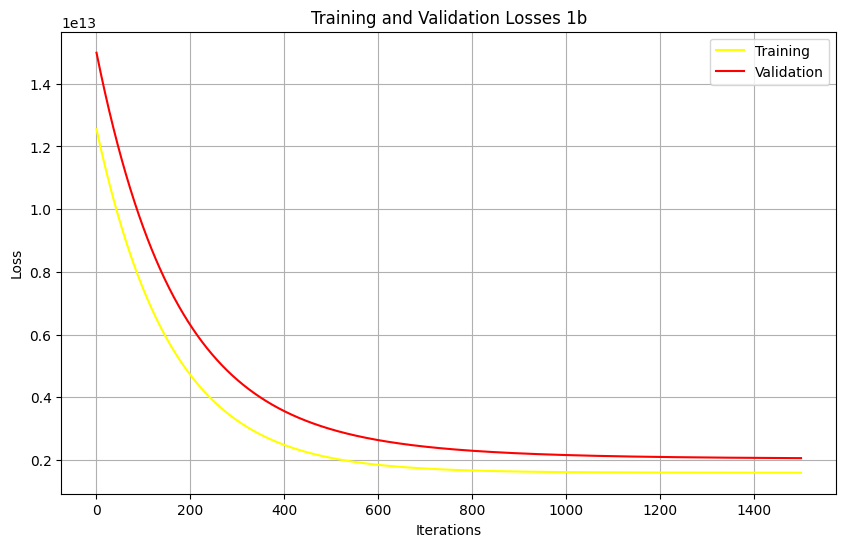

Final theta = [1.94414238e-01 8.30456190e+02 6.23040945e-01 2.92262567e-01
 4.24703443e-01 1.72499519e-01 4.67442179e-02 9.14051009e-02
 1.43612303e-02 9.52339961e-02 1.55536609e-01 5.97006390e-02]
Cost History = [1.25482202e+13 1.24794782e+13 1.24111673e+13 ... 1.59026464e+12
 1.59025907e+12 1.59025353e+12]
Validation Loss = [1.49905413e+13 1.49165298e+13 1.48429597e+13 ... 2.05581743e+12
 2.05574642e+12 2.05567565e+12]


In [91]:
#1b
varlist = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement',
           'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'price']

onebTrain = df_train[varlist]
one1bTest = df_test[varlist]

iterations = 1500
alpha = 0.0000000001

theta = np.zeros(len(varlist))

y = onebTrain.pop('price')
x = onebTrain

x0 = np.ones((m, 1))
x = np.hstack((x0, x))

lRate = 0.1

valueY = one1bTest.pop('price')
valueX = one1bTest

x0 = np.ones((n, 1))
valueX = np.hstack((x0, valueX))

theta, costHistory, validationCost = gradDescent(x, y, valueX, valueY, theta, alpha, iterations, lRate)

iteration_array = np.arange(1, iterations + 1)

plt.figure(figsize=(10, 6))
plt.plot(iteration_array, costHistory, color= 'yellow', label = 'Training')
plt.plot(iteration_array, validationCost, color= 'red', label = 'Validation')
plt.title("Training and Validation Losses 1b")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend()
plt.grid()

plt.show()
print('Final theta =',theta)
print('Cost History =',costHistory)
print('Validation Loss =', validationCost)

<ipython-input-77-fdfb9f466ffd>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twoaTrain[varlist] = scaler.fit_transform(twoaTrain[varlist] )
<ipython-input-77-fdfb9f466ffd>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twoaTest[varlist] = scaler.fit_transform(twoaTest[varlist])


Final theta = [0.17301377 0.05923351 0.0780865  0.03344787 0.066835   0.06022375]
Cost History = [0.05350857 0.05339184 0.05327543 ... 0.01079792 0.01079555 0.01079319]
Validation Loss = [0.05859562 0.05847408 0.05835288 ... 0.01382297 0.01382036 0.01381775]


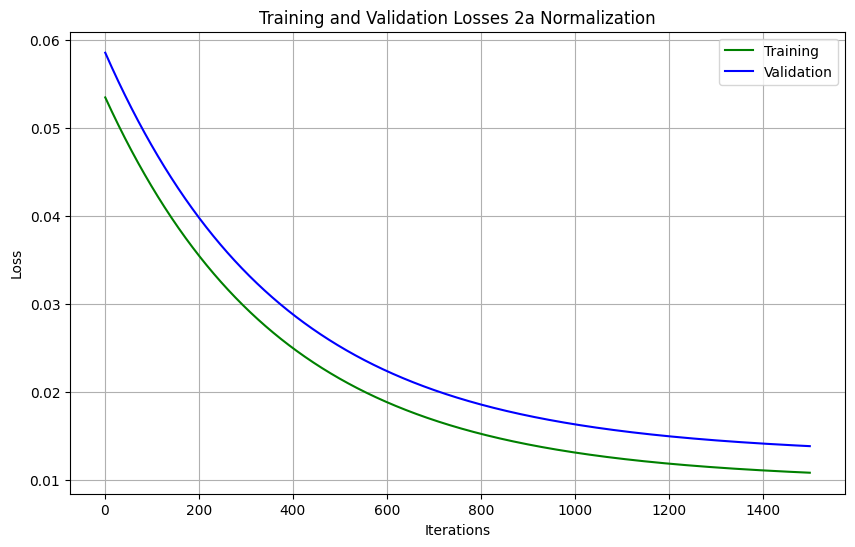

In [77]:
#2a

varlist = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']

twoaTrain = df_train[varlist]
twoaTest = df_test[varlist]

iterations = 1500
alpha = 0.001
lRate = 0.1

#normalization

scaler = MinMaxScaler()
twoaTrain[varlist] = scaler.fit_transform(twoaTrain[varlist] )
twoaTest[varlist] = scaler.fit_transform(twoaTest[varlist])

theta = np.zeros(len(varlist))

y = twoaTrain.pop('price')
x = twoaTrain

x0 = np.ones((m, 1))
x = np.hstack((x0, x))

valueY = twoaTest.pop('price')
valueX = twoaTest

x0 = np.ones((n, 1))
valueX = np.hstack((x0, valueX))

theta, costHistory, validationCost = gradDescent(x, y, valueX, valueY, theta, alpha, iterations, lRate)

iteration_array = np.arange(1, iterations + 1)

plt.figure(figsize=(10, 6))
plt.plot(iteration_array, costHistory, color= 'green', label = 'Training')
plt.plot(iteration_array, validationCost, color= 'blue', label = 'Validation')
plt.title("Training and Validation Losses 2a Normalization")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend()
plt.grid()

print('Final theta =',theta)
print('Cost History =',costHistory)
print('Validation Loss =', validationCost)

<ipython-input-78-a3c7c24f1f41>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twoaTrain[varlist] = scaler.fit_transform(twoaTrain[varlist] )
<ipython-input-78-a3c7c24f1f41>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twoaTest[varlist] = scaler.fit_transform(twoaTest[varlist])


Final theta = [-1.57679392e-16  3.19240900e-01  1.23702723e-01  2.78430154e-01
  2.05053017e-01  1.77197206e-01]
Cost History = [0.49898702 0.49797783 0.49697243 ... 0.22314113 0.22313352 0.22312593]
Validation Loss = [0.49896739 0.49793862 0.49691366 ... 0.21459813 0.21459039 0.21458267]


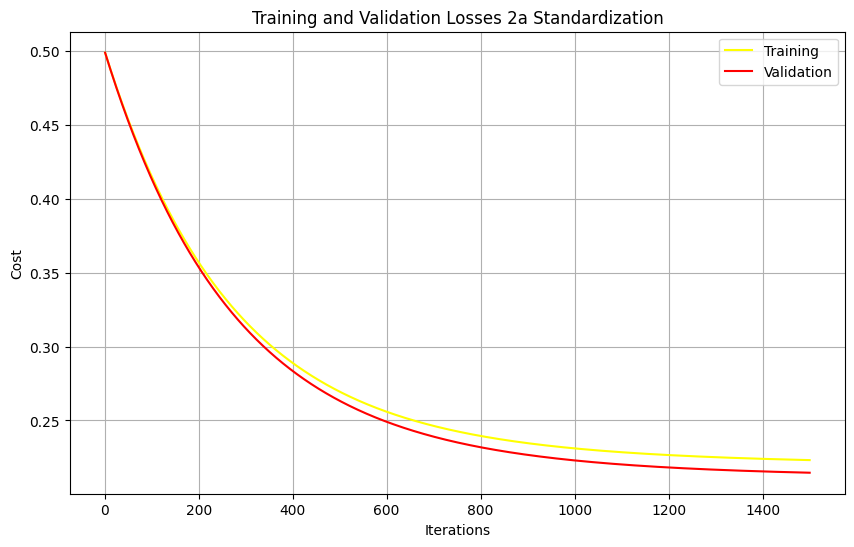

In [78]:
#2a standardization

twoaTrain = df_train[varlist]
twoaTest = df_test[varlist]

scaler = StandardScaler()
twoaTrain[varlist] = scaler.fit_transform(twoaTrain[varlist] )
twoaTest[varlist] = scaler.fit_transform(twoaTest[varlist])

theta = np.zeros(len(varlist))

y = twoaTrain.pop('price')
x = twoaTrain

x0 = np.ones((m, 1))
x = np.hstack((x0, x))

testY = twoaTest.pop('price')
testX = twoaTest

x0 = np.ones((n, 1))
testX = np.hstack((x0, testX))

theta, costHistory, validationCost = gradDescent(x, y, testX, testY, theta, alpha, iterations, lRate)

iteration_array = np.arange(1, iterations + 1)

plt.figure(figsize=(10, 6))
plt.plot(iteration_array, costHistory, color= 'yellow', label = 'Training')
plt.plot(iteration_array, validationCost, color= 'red', label = 'Validation')
plt.title('Training and Validation Losses 2a Standardization')
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.legend()
plt.grid()

print('Final theta =',theta)
print('Cost History =',costHistory)
print('Validation Loss =', validationCost)

<ipython-input-79-42816e4981ee>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twobTrain[varlist] = scaler.fit_transform(twobTrain[varlist])
<ipython-input-79-42816e4981ee>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twobTest[varlist] = scaler.fit_transform(twobTest[varlist])


Final theta = [0.0520438  0.109524   0.07015176 0.11896413 0.10884027 0.05877394
 0.03934649 0.03535374 0.04218429 0.09931123 0.09306292 0.06249127]
Cost History = [0.0513978  0.04928018 0.0472673  ... 0.00554014 0.00553953 0.00553892]
Validation Loss = [0.05642177 0.05423849 0.05216209 ... 0.00693835 0.00693769 0.00693703]


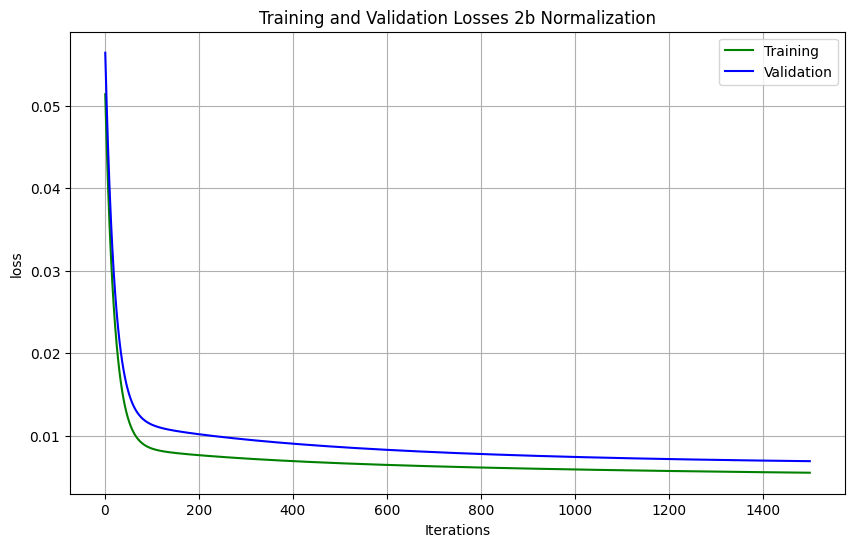

In [79]:
#2b

varlist = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement',
           'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'price']

twobTrain = df_train[varlist]
twobTest = df_test[varlist]

iterations = 1500
alpha = 0.01
lRate = 0.1

#normalization
scaler = MinMaxScaler()
twobTrain[varlist] = scaler.fit_transform(twobTrain[varlist])
twobTest[varlist] = scaler.fit_transform(twobTest[varlist])

theta = np.zeros(len(varlist))

y = twobTrain.pop('price')
x = twobTrain

x0 = np.ones((m, 1))
x = np.hstack((x0, x))

testY = twobTest.pop('price')
testX = twobTest

x0 = np.ones((n, 1))
testX = np.hstack((x0, testX))

theta, costHistory, validationCost = gradDescent(x, y, testX, testY, theta, alpha, iterations, lRate)

iteration_array = np.arange(1, iterations + 1)

plt.figure(figsize=(10, 6))
plt.plot(iteration_array, costHistory, color= 'green', label = 'Training')
plt.plot(iteration_array, validationCost, color= 'blue', label = 'Validation')
plt.title('Training and Validation Losses 2b Normalization')
plt.xlabel("Iterations")
plt.ylabel("loss")
plt.legend()
plt.grid()

print('Final theta =',theta)
print('Cost History =',costHistory)
print('Validation Loss =', validationCost)

<ipython-input-80-9bd97bed91ea>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twobTrain[varlist] = scaler.fit_transform(twobTrain[varlist])
<ipython-input-80-9bd97bed91ea>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twobTest[varlist] = scaler.fit_transform(twobTest[varlist])


Final theta = [-2.07405408e-16  2.97907949e-01  3.35734828e-02  3.01209687e-01
  2.08125540e-01  8.21606758e-02  5.32938242e-02  1.18546557e-01
  8.87913402e-02  2.12477953e-01  1.20331925e-01  1.53505964e-01]
Cost History = [0.48482118 0.4703455  0.45654008 ... 0.16093983 0.16093982 0.16093982]
Validation Loss = [0.48471992 0.47013073 0.45620071 ... 0.16038501 0.1603851  0.16038519]


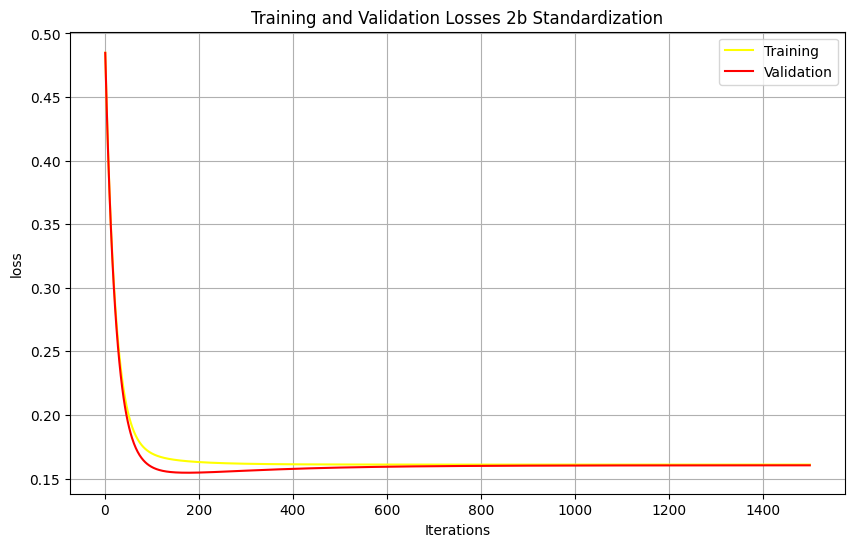

In [80]:
#2b standardization

twobTrain = df_train[varlist]
twobTest = df_test[varlist]

scaler = StandardScaler()
twobTrain[varlist] = scaler.fit_transform(twobTrain[varlist])
twobTest[varlist] = scaler.fit_transform(twobTest[varlist])

theta = np.zeros(len(varlist))

y = twobTrain.pop('price')
x = twobTrain

x0 = np.ones((m, 1))
x = np.hstack((x0, x))

testY = twobTest.pop('price')
testX = twobTest

x0 = np.ones((n, 1))
testX = np.hstack((x0, testX))

theta, costHistory, validationCost = gradDescent(x, y, testX, testY, theta, alpha, iterations, lRate)

iteration_array = np.arange(1, iterations + 1)

plt.figure(figsize=(10, 6))
plt.plot(iteration_array, costHistory, color= 'yellow', label = 'Training')
plt.plot(iteration_array, validationCost, color= 'red', label = 'Validation')
plt.title('Training and Validation Losses 2b Standardization')
plt.xlabel("Iterations")
plt.ylabel("loss")
plt.legend()
plt.grid()

print('Final theta =',theta)
print('Cost History =',costHistory)
print('Validation Loss =', validationCost)

<ipython-input-97-396d0cf41c85>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  threeaTrain[varlist] = scaler.fit_transform(threeaTrain[varlist] )
<ipython-input-97-396d0cf41c85>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  threeaTest[varlist] = scaler.fit_transform(threeaTest[varlist])


Final theta = [0. 0. 0. 0. 0. 0.]
Cost History = [1.25482202e+13 1.24794782e+13 1.24111673e+13 ... 1.59026464e+12
 1.59025907e+12 1.59025353e+12]
Validation Loss = [1.49905413e+13 1.49165298e+13 1.48429597e+13 ... 2.05581743e+12
 2.05574642e+12 2.05567565e+12]


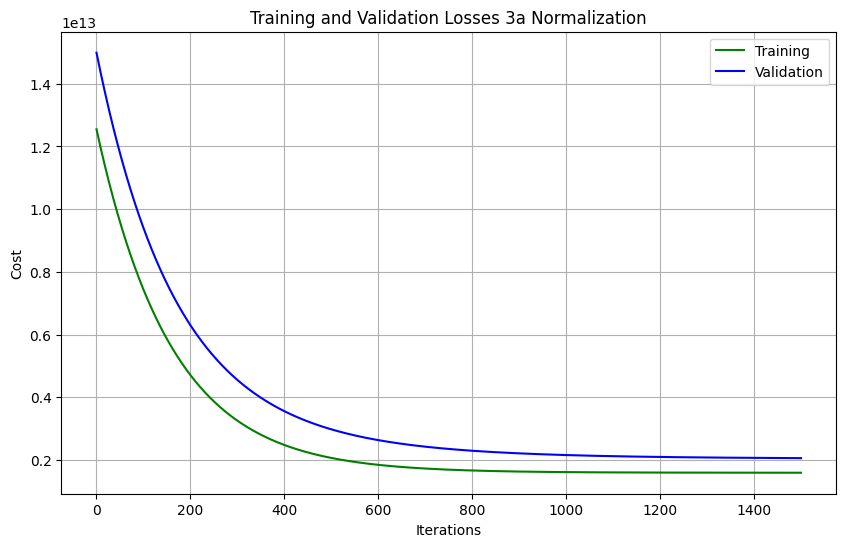

In [97]:
#3a

varlist = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']

threeaTrain = df_train[varlist]
threeaTest = df_test[varlist]

iterations = 1500
alpha = 0.01
lRate = 0.1

#normalization

scaler = MinMaxScaler()
threeaTrain[varlist] = scaler.fit_transform(threeaTrain[varlist] )
threeaTest[varlist] = scaler.fit_transform(threeaTest[varlist])

theta = np.zeros(len(varlist))

y = threeaTrain.pop('price')
x = threeaTrain

x0 = np.ones((m, 1))
x = np.hstack((x0, x))

testY = threeaTest.pop('price')
testX = threeaTest

x0 = np.ones((n, 1))
testX = np.hstack((x0, testX))

def gradDescent(x, y, testX, testY, theta, alpha, iterations, lRate):
    m = len(y)
    history = []

    for _ in range(iterations):

        predictions = np.dot(x, theta)
        error = predictions - y

        gradient = (1 / m) * np.dot(x.T, error) + (lRate / m) * theta

        theta -= lRate * gradient

        loss = calculateLoss(x, y, theta) + (lRate / (2 * m)) * np.sum(np.square(theta))

        history.append(loss)

    return theta, history


iteration_array = np.arange(1, iterations + 1)

plt.figure(figsize=(10, 6))
plt.plot(iteration_array, costHistory, color= 'green', label = 'Training')
plt.plot(iteration_array, validationCost, color= 'blue', label = 'Validation')
plt.title('Training and Validation Losses 3a Normalization')
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.legend()
plt.grid()

print('Final theta =',theta)
print('Cost History =',costHistory)
print('Validation Loss =', validationCost)

<ipython-input-93-6d0d58043ed9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  threeaTrain[varlist] = scaler.fit_transform(threeaTrain[varlist])
<ipython-input-93-6d0d58043ed9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  threeaTest[varlist] = scaler.fit_transform(threeaTest[varlist])


Final theta = [0. 0. 0. 0. 0. 0.]
Cost History = [1.25482202e+13 1.24794782e+13 1.24111673e+13 ... 1.59026464e+12
 1.59025907e+12 1.59025353e+12]
Validation Loss = [1.49905413e+13 1.49165298e+13 1.48429597e+13 ... 2.05581743e+12
 2.05574642e+12 2.05567565e+12]


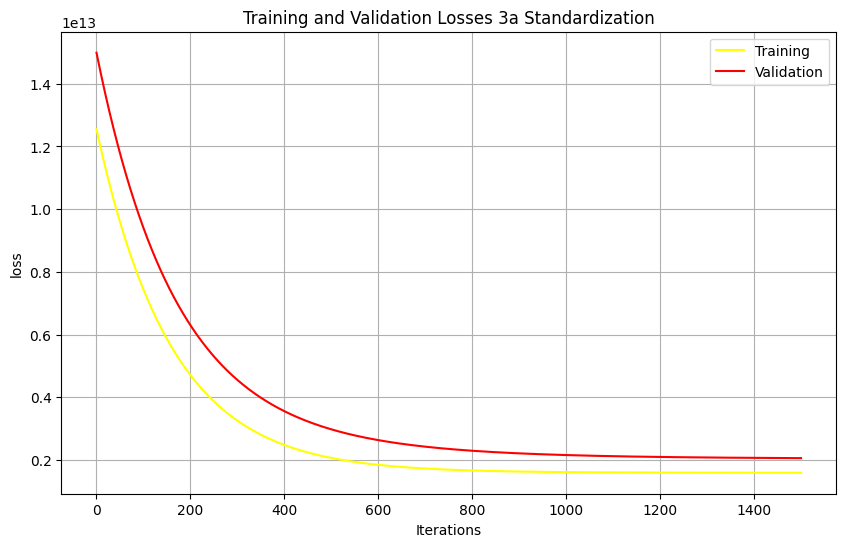

In [93]:
#standarization
threeaTrain = df_train[varlist]
threeaTest = df_test[varlist]

scaler = StandardScaler()
threeaTrain[varlist] = scaler.fit_transform(threeaTrain[varlist])
threeaTest[varlist] = scaler.fit_transform(threeaTest[varlist])

theta = np.zeros(len(varlist))

y = threeaTrain.pop('price')
x = threeaTrain

x0 = np.ones((m, 1))
x = np.hstack((x0, x))

testY = threeaTest.pop('price')
testX = threeaTest

x0 = np.ones((n, 1))
testX = np.hstack((x0, testX))

def gradDescent(x, y, testX, testY, theta, alpha, iterations, lRate):
    m = len(y)
    history = []

    for _ in range(iterations):

        predictions = np.dot(x, theta)
        error = predictions - y

        gradient = (1 / m) * np.dot(x.T, error) + (lRate / m) * theta

        theta -= lRate * gradient

        loss = calculateLoss(x, y, theta) + (lRate / (2 * m)) * np.sum(np.square(theta))

        history.append(loss)

    return theta, history

iteration_array = np.arange(1, iterations + 1)

plt.figure(figsize=(10, 6))
plt.plot(iteration_array, costHistory, color= 'yellow', label = 'Training')
plt.plot(iteration_array, validationCost, color= 'red', label = 'Validation')
plt.title('Training and Validation Losses 3a Standardization')
plt.xlabel("Iterations")
plt.ylabel("loss")
plt.legend()
plt.grid()

print('Final theta =',theta)
print('Cost History =',costHistory)
print('Validation Loss =', validationCost)

<ipython-input-96-e2511a9a3241>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  threebTrain[varlist] = scaler.fit_transform(threebTrain[varlist] )
<ipython-input-96-e2511a9a3241>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  threebTest[varlist] = scaler.fit_transform(threebTest[varlist])


Final theta = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Cost History = [1.25482202e+13 1.24794782e+13 1.24111673e+13 ... 1.59026464e+12
 1.59025907e+12 1.59025353e+12]
Validation Loss = [1.49905413e+13 1.49165298e+13 1.48429597e+13 ... 2.05581743e+12
 2.05574642e+12 2.05567565e+12]


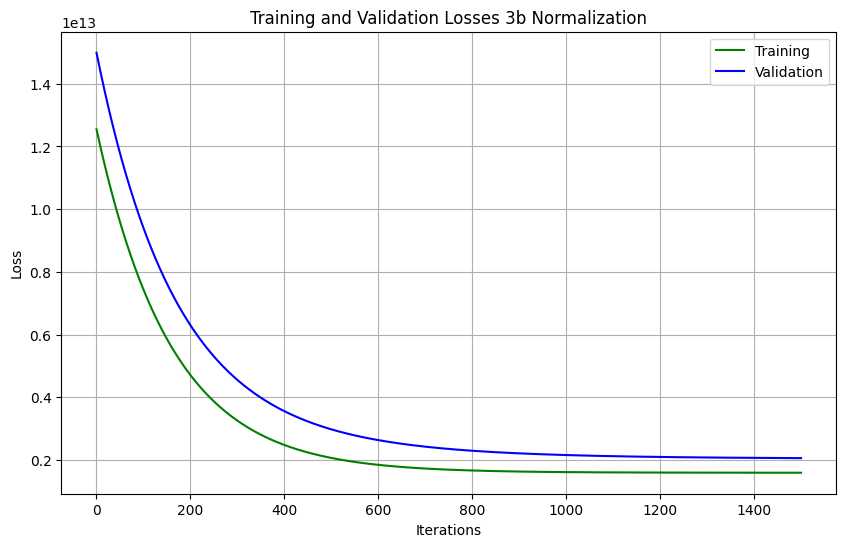

In [96]:
#3b

varlist = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement',
           'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'price']

threebTrain = df_train[varlist]
threebTest = df_test[varlist]

iterations = 1500
alpha = 0.01
lRate = 0.1

scaler = MinMaxScaler()
threebTrain[varlist] = scaler.fit_transform(threebTrain[varlist] )
threebTest[varlist] = scaler.fit_transform(threebTest[varlist])

theta = np.zeros(len(varlist))

y = threebTrain.pop('price')
x = threebTrain

x0 = np.ones((m, 1))
x = np.hstack((x0, x))

testY = threebTest.pop('price')
testX = threebTest

x0 = np.ones((n, 1))
testX = np.hstack((x0, testX))

def gradDescent(x, y, testX, testY, theta, alpha, iterations, lRate):
    m = len(y)
    history = []

    for _ in range(iterations):

        predictions = np.dot(x, theta)
        error = predictions - y

        gradient = (1 / m) * np.dot(x.T, error) + (lRate / m) * theta

        theta -= lRate * gradient

        loss = calculateLoss(x, y, theta) + (lRate / (2 * m)) * np.sum(np.square(theta))

        history.append(loss)

    return theta, history



iteration_array = np.arange(1, iterations + 1)

plt.figure(figsize=(10, 6))
plt.plot(iteration_array, costHistory, color= 'green', label = 'Training')
plt.plot(iteration_array, validationCost, color= 'blue', label = 'Validation')
plt.title('Training and Validation Losses 3b Normalization')
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend()
plt.grid()

print('Final theta =',theta)
print('Cost History =',costHistory)
print('Validation Loss =', validationCost)

<ipython-input-95-4c0c7a637d78>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  threebTrain[varlist] = scaler.fit_transform(threebTrain[varlist])
<ipython-input-95-4c0c7a637d78>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  threebTest[varlist] = scaler.fit_transform(threebTest[varlist])


Final theta = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Cost History = [1.25482202e+13 1.24794782e+13 1.24111673e+13 ... 1.59026464e+12
 1.59025907e+12 1.59025353e+12]
Validation Loss = [1.49905413e+13 1.49165298e+13 1.48429597e+13 ... 2.05581743e+12
 2.05574642e+12 2.05567565e+12]


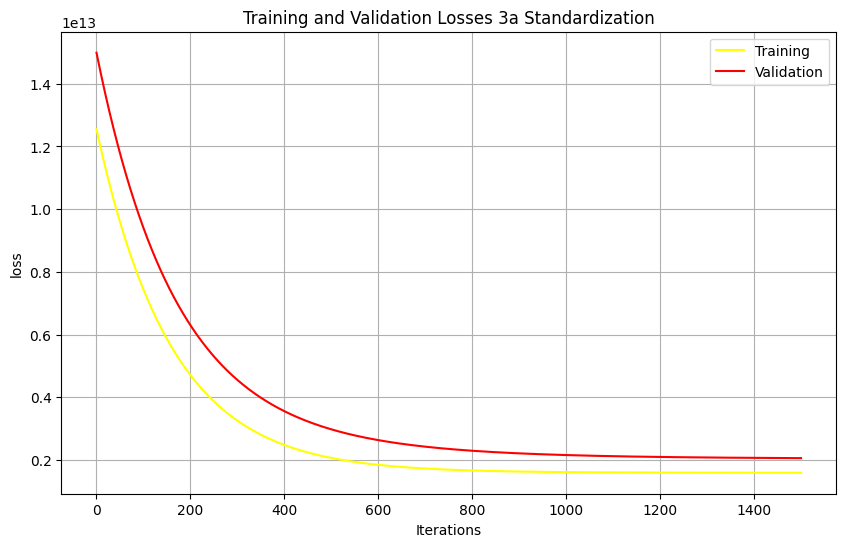

In [95]:
#standarization
threebTrain = df_train[varlist]
threebTest = df_test[varlist]

scaler = StandardScaler()
threebTrain[varlist] = scaler.fit_transform(threebTrain[varlist])
threebTest[varlist] = scaler.fit_transform(threebTest[varlist])

theta = np.zeros(len(varlist))

y = threebTrain.pop('price')
x = threebTrain

x0 = np.ones((m, 1))
x = np.hstack((x0, x))

testY = threebTest.pop('price')
testX = threebTest

x0 = np.ones((n, 1))
testX = np.hstack((x0, testX))

def gradDescent(x, y, testX, testY, theta, alpha, iterations, lRate):
    m = len(y)
    history = []

    for _ in range(iterations):

        predictions = np.dot(x, theta)
        error = predictions - y

        gradient = (1 / m) * np.dot(x.T, error) + (lRate / m) * theta

        theta -= lRate * gradient

        loss = calculateLoss(x, y, theta) + (lRate / (2 * m)) * np.sum(np.square(theta))

        history.append(loss)

    return theta, history

iteration_array = np.arange(1, iterations + 1)

plt.figure(figsize=(10, 6))
plt.plot(iteration_array, costHistory, color= 'yellow', label = 'Training')
plt.plot(iteration_array, validationCost, color= 'red', label = 'Validation')
plt.title('Training and Validation Losses 3a Standardization')
plt.xlabel("Iterations")
plt.ylabel("loss")
plt.legend()
plt.grid()

print('Final theta =',theta)
print('Cost History =',costHistory)
print('Validation Loss =', validationCost)